In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [10]:
df = pd.read_csv("Coffe_sales.csv")
df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [3]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


# STEP-1 CONVERTING DATE AND TIME COLUMN DATATYPE AND  STANDARD FORMATTING 

In [18]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

In [20]:
df['Time'] = df['Time'].str.extract(r'(\d{2}:\d{2}:\d{2})')[0]

In [21]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.strftime('%H:%M:%S')

In [26]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB


# CHECKING FOR ANY DUPLICATE VALUE IN THE DATASET

In [33]:
df.duplicated().sum()

np.int64(0)

# IDENTIFING PEAK SALES HOURS AND BEST-SELLING COFFEE TYPE 

In [42]:
# Count number of sales per hour
peak_hours = df['hour_of_day'].value_counts().sort_index()
# Display peak hours
print("Sales per hour:")
print(peak_hours)

Sales per hour:
hour_of_day
6       5
7      88
8     235
9     242
10    328
11    283
12    241
13    225
14    225
15    236
16    278
17    237
18    218
19    229
20    169
21    195
22    113
Name: count, dtype: int64


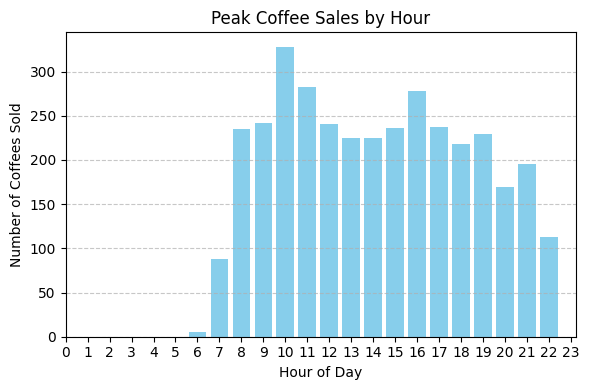

In [50]:
peak_hours_of_day = df['hour_of_day'].unique()
Number_of_coffee_sold = df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(6,4))  # ✅ use figsize, not figure
plt.bar(Number_of_coffee_sold.index, Number_of_coffee_sold.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Coffees Sold')
plt.title('Peak Coffee Sales by Hour')
plt.xticks(range(0, 24))  # optional: show all 24 hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# BEST SELLING COFFEE TYPES

In [51]:
# Count number of sales per coffee type
top_coffee = df['coffee_name'].value_counts()

# Display best-selling coffee types
print("Best-selling coffee types:")
print(top_coffee)

Best-selling coffee types:
coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64


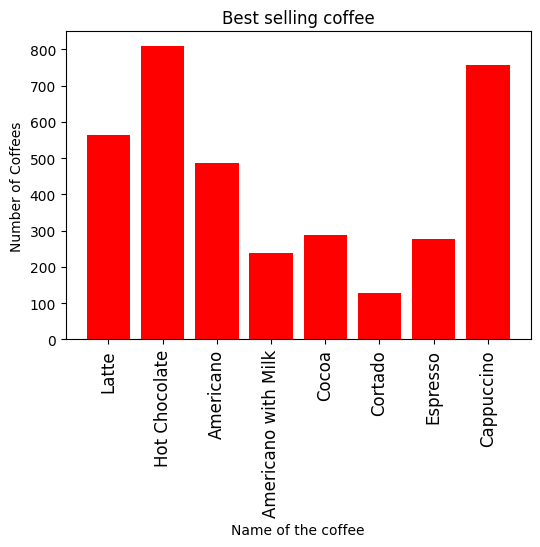

In [52]:
coffee_type = df['coffee_name'].unique()
number_of_coffee = df['coffee_name'].value_counts().sort_index()
plt.figure(figsize=(6,4))  # ✅ use figsize, not figure
plt.bar(coffee_type,number_of_coffee, color='red')
plt.xlabel('Name of the coffee')
plt.ylabel('Number of Coffees')
plt.title('Best selling coffee')
plt.xticks(rotation=90,fontsize=12)
plt.show()

# COMPARE PAYMENT METHOD PREFERENCES

In [61]:
payment_counts = df['cash_type'].value_counts()
print(payment_counts)

cash_type
card    3547
Name: count, dtype: int64


In [62]:
payment_percent = df['cash_type'].value_counts(normalize=True) * 100
print(payment_percent)

cash_type
card    100.0
Name: proportion, dtype: float64


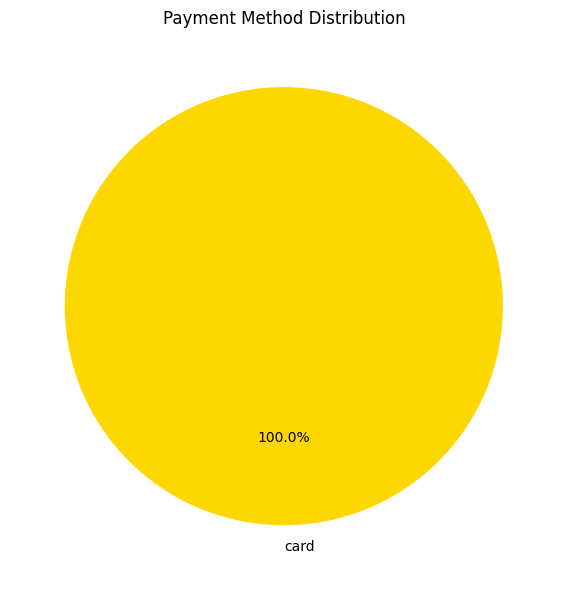

In [63]:
plt.figure(figsize=(6, 6))
payment_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Study customer behaviour across weekdays and months 

In [64]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14


In [65]:
weekday_counts = df['Weekday'].value_counts().sort_index()
print("Customer visits by weekday:")
print(weekday_counts)

Customer visits by weekday:
Weekday
Fri    532
Mon    544
Sat    470
Sun    419
Thu    510
Tue    572
Wed    500
Name: count, dtype: int64


In [69]:
month_counts = df['Month_name'].value_counts().sort_index()
print("Customer visits by month:")
print(month_counts)

Customer visits by month:
Month_name
Apr    168
Aug    272
Dec    259
Feb    423
Jan    201
Jul    237
Jun    223
Mar    494
May    241
Nov    259
Oct    426
Sep    344
Name: count, dtype: int64


# Cross-tab analysis (Weekday vs Month)

In [70]:
behavior_matrix = pd.crosstab(df['Weekday'], df['Month_name'])
print("Customer behavior across weekdays and months:")
print(behavior_matrix)

Customer behavior across weekdays and months:
Month_name  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
Weekday                                                               
Fri          25   34   29   71   40   39   26   89   32   43   65   39
Mon          29   41   41   88   29   24   27   69   37   34   65   60
Sat          23   47   40   33   32   27   35   72   20   53   38   50
Sun          23   37   43   32   10   24   39   40   35   29   50   57
Thu          23   44   28   63   37   27   33   67   48   35   64   41
Tue          26   35   45   56   28   49   31   76   36   47   78   65
Wed          19   34   33   80   25   47   32   81   33   18   66   32


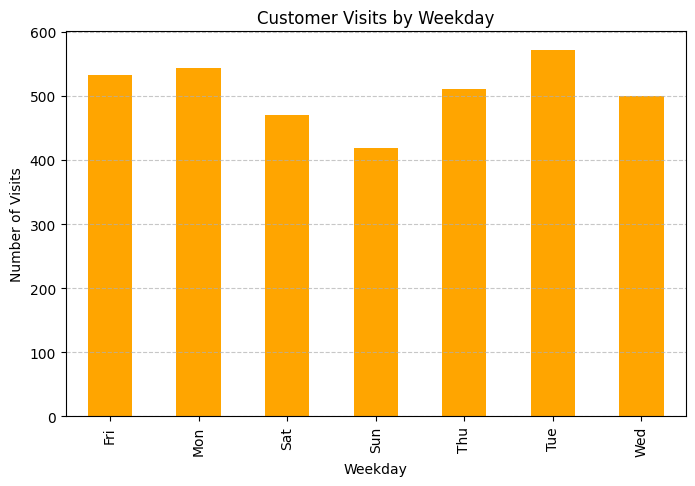

In [74]:
weekday_counts.plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Customer Visits by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Visits')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

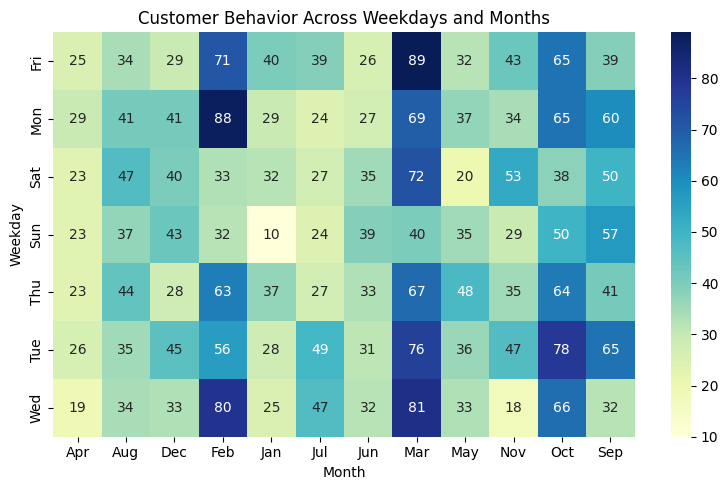

In [75]:
plt.figure(figsize=(8, 5))
sns.heatmap(behavior_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Customer Behavior Across Weekdays and Months')
plt.xlabel('Month')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()